IMPORTING THE Dependencies


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf

# random value of seed,  just like random test value that we have in train_test split
tf.random.set_seed(3)

# tensorflow is developed by goggle
from tensorflow import keras

from keras.datasets import mnist
from tensorflow.math import confusion_matrix


Loading the MNIST data from keras dataset

In [64]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [65]:
type(X_train)

numpy.ndarray

In [66]:
# shape of the numpy array
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


means 60000 images having dimension of 28 cross 28. all image srae grayscale images, y_train is unit8 numpy array of digit label from 0-9 with shape 60000, for the training dataset


Training data=60000 images
Test data=10000 imagess

Image Dimesnion->> 28 x 28
Grayscale image ->> 1 channel

In [67]:
# printing the 10th image from the X_traib

print(X_train[10])
# it will be in numpy array


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [68]:
print(X_train[10].shape)

(28, 28)


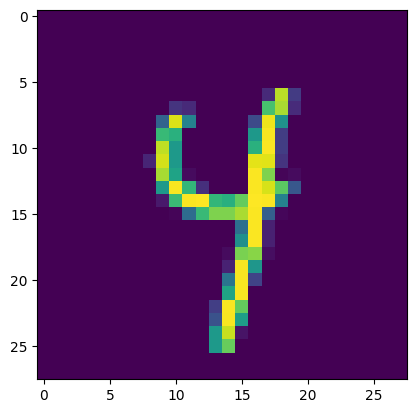

4


In [69]:
# displaying the image
plt.imshow(X_train[26])
plt.show()

# print the  corresponding label
print(y_train[26])

In [70]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [71]:
# unique values in Y_train

print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [72]:
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


We can use these lables as such or we can also apply one hot encoding
(in 1 or 0 form)

All the images has same dimension in the datset , if not than we have to rasize all the images to common dimension


In [73]:
# scaling the value 
# also called normalization

X_train=X_train/255
X_test=X_test/255

In [74]:
print(X_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


Building neural network


In [75]:
# setting up the layerss of the neural network

model=keras.Sequential([
    # flatten to make the matrix array to single dimension
           keras.layers.Flatten(input_shape=(28,28)),
           keras.layers.Dense(50, activation='relu'),
           keras.layers.Dense(50, activation='relu'),
           keras.layers.Dense(10,activation='sigmoid'),

])

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [76]:
# compiling the neural netwok

# optimizer-> is to determine the most optimum parameter
# since the labels used are from -0 to 9 instead of 0 or 1 that
#  we get after one hot encoding, so loss function is this but if 
# one hot encoding than loss func would be categorical_crossentropy
model.compile(optimizer='adam' ,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [77]:
# Training the nwural network
model.fit(X_train,y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8487 - loss: 0.5278
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9558 - loss: 0.1492
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9679 - loss: 0.1067
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9753 - loss: 0.0824
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9802 - loss: 0.0666
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9838 - loss: 0.0539
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9863 - loss: 0.0458
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9875 - loss: 0.0403
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9897 - loss: 0.0335
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9901 - loss: 0.0311


main goal os to minimize the loss function

*Accuracy on Test data*

In [78]:
loss,accuracy=model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9603 - loss: 0.1506


In [79]:
print(accuracy)

0.9664999842643738


In [80]:
print(X_test.shape)

(10000, 28, 28)


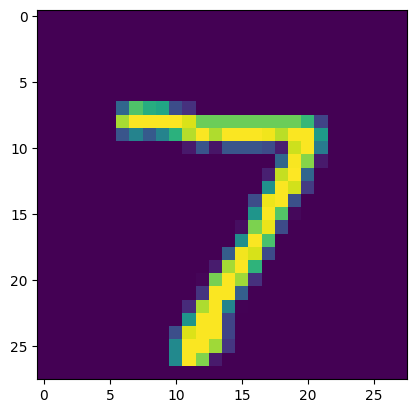

7


In [81]:
# dispaly the point in x_test
plt.imshow(X_test[0])
plt.show()

print(y_test[0])

In [82]:
y_pred=model.predict(X_test)

print(y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)


In [83]:
print(y_pred[0])

[3.8642531e-05 3.5143024e-05 1.4518175e-03 8.4540987e-01 4.1211248e-08
 8.5071847e-04 3.7546979e-11 9.9997222e-01 8.4436141e-02 7.1443456e-01]


model.predict() gives the prediction probablity of each class for that data point

In [84]:
# converting the prediction prob to class label

label_for_first_image=np.argmax(y_pred[0])
print(label_for_first_image)

7


In [85]:
# converting the prediction prob to class label for all  test data points

y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 9, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 8, 5, 4, 7, 6, 8, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 9, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test= True labels

y_pred_labels=predicted labels

**Confusion Matrix**

In [86]:
conf_mat=confusion_matrix(y_test,y_pred_labels)

print(conf_mat)

tf.Tensor(
[[ 942    0    3    0    3    2    6    1    6   17]
 [   0 1113    3    3    0    1    2    1   12    0]
 [   1    0  991    6    4    0    4    3   22    1]
 [   0    0    2  993    0    2    0    2    5    6]
 [   0    0    3    0  936    0    9    0    3   31]
 [   1    1    1   22    1  846    5    0    7    8]
 [   2    3    0    1    2    7  940    0    3    0]
 [   0    5   10    4    2    1    0  966    5   35]
 [   1    0    1    7    2    4    3    2  945    9]
 [   1    2    0    6    6    1    2    0    1  990]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Label')

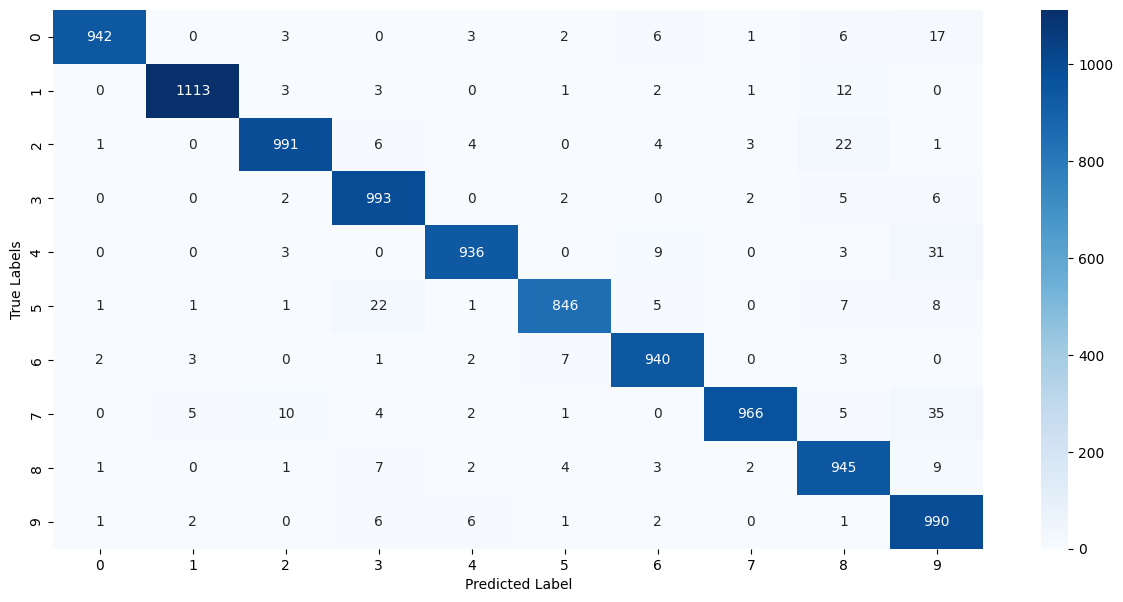

In [87]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Label')

Building the Predictive system

In [88]:
# read the image and convert it into numpy
input_image_path='MNIST_digit.png'

input_image=cv2.imread(input_image_path)


In [89]:
type(input_image)

numpy.ndarray

In [90]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [91]:
import cv2

# Display the image in a window
cv2.imshow('Image', input_image)
cv2.waitKey(0)  # Wait for a key press to close the window
cv2.destroyAllWindows()


In [92]:
input_image.shape

(318, 318, 3)

In [93]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [94]:
grayscale.shape


(318, 318)

In [95]:
input_image_resized=cv2.resize(grayscale,(28,28))

In [96]:
input_image_resized.shape

(28, 28)

In [97]:
cv2.imshow('Image', input_image_resized)
cv2.waitKey(0)  # Wait for a key press to close the window
cv2.destroyAllWindows()

In [98]:
input_image_resized=input_image_resized/255

This reshaping is done to tell the neural network that only one image we are giving for predicting , just like we gave (1,-1)

In [99]:
image_reshaped=np.reshape(input_image_resized,[1,28,28])

In [100]:
image_reshaped.shape

(1, 28, 28)

In [101]:
type(image_reshaped)

numpy.ndarray

In [102]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[1.1922889e-07 1.0950690e-03 9.6943128e-05 1.0000000e+00 2.1478635e-14
  1.2217188e-03 1.4023135e-15 1.5815120e-05 9.7731149e-01 9.1305166e-01]]


In [103]:
input_prediction_label=np.argmax(input_prediction)

In [104]:
print(input_prediction_label)

3


**predictive system**

In [ ]:
inpit_image_path=input('path of the image prdictive')

input_image=cv2.imread(input_image_path)

grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resized=cv2.resize(grayscale,(28,28))

input_image_resized=input_image_resized/255

image_reshaped=np.reshape(input_image_resized,[1,28,28])

input_prediction=model.predict(image_reshaped)

input_prediction_label=np.argmax(input_prediction)